<a href="https://colab.research.google.com/github/CarolinaOutoffice/desafio_telecom_x/blob/main/desafio_telecom_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Telecom X

##Extracción


📘 DICCIONARIO DE DATOS

| Campo             | Descripción                                                                 |
|-------------------|------------------------------------------------------------------------------|
| customerID        | Número de identificación único de cada cliente                              |
| Churn             | Si el cliente dejó o no la empresa                                           |
| gender            | Género (masculino o femenino)                                                |
| SeniorCitizen     | Información sobre si un cliente tiene o no una edad igual o mayor a 65 años |
| Partner           | Si el cliente tiene o no una pareja                                          |
| Dependents        | Si el cliente tiene o no dependientes                                        |
| tenure            | Meses de contrato del cliente                                                |
| PhoneService      | Suscripción al servicio telefónico                                           |
| MultipleLines     | Suscripción a más de una línea telefónica                                    |
| InternetService   | Suscripción a un proveedor de internet                                       |
| OnlineSecurity    | Suscripción adicional de seguridad en línea                                  |
| OnlineBackup      | Suscripción adicional de respaldo en línea                                   |
| DeviceProtection  | Suscripción adicional de protección del dispositivo                          |
| TechSupport       | Suscripción adicional de soporte técnico, menor tiempo de espera             |
| StreamingTV       | Suscripción de televisión por cable                                          |
| StreamingMovies   | Suscripción de streaming de películas                                        |
| Contract          | Tipo de contrato                                                             |
| PaperlessBilling  | Si el cliente prefiere recibir la factura en línea                           |
| PaymentMethod     | Forma de pago                                                                |
| Charges.Monthly   | Total de todos los servicios del cliente por mes                             |
| Charges.Total     | Total gastado por el cliente                                                 |


In [214]:
#!pip install requests
import requests
import pandas as pd
import matplotlib.pyplot as plt

#url de la API
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

#realizamos la solicitud GET
respuesta_api=requests.get(url)
data=respuesta_api.json()


In [215]:
df=pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## Transformación

In [217]:
#Normalizamos
df_normalizado=pd.json_normalize(data)
print(df_normalizado.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [218]:
df_normalizado.info()
df_normalizado.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###Revision general (analisis exploratorio)

In [219]:
#Verificar valores unicos
for columna in df_normalizado.columns:
  valores_unicos=df_normalizado[columna].nunique()
  print(f'La columna {columna} tiene {valores_unicos} valores unicos')
  if df_normalizado[columna].nunique() < 50:
    print(df_normalizado[columna].unique())
    print('-' * 50)

La columna customerID tiene 7267 valores unicos
La columna Churn tiene 3 valores unicos
['No' 'Yes' '']
--------------------------------------------------
La columna customer.gender tiene 2 valores unicos
['Female' 'Male']
--------------------------------------------------
La columna customer.SeniorCitizen tiene 2 valores unicos
[0 1]
--------------------------------------------------
La columna customer.Partner tiene 2 valores unicos
['Yes' 'No']
--------------------------------------------------
La columna customer.Dependents tiene 2 valores unicos
['Yes' 'No']
--------------------------------------------------
La columna customer.tenure tiene 73 valores unicos
La columna phone.PhoneService tiene 2 valores unicos
['Yes' 'No']
--------------------------------------------------
La columna phone.MultipleLines tiene 3 valores unicos
['No' 'Yes' 'No phone service']
--------------------------------------------------
La columna internet.InternetService tiene 3 valores unicos
['DSL' 'Fiber o

In [220]:
#Vericar duplicados
duplicados=df_normalizado[columna].duplicated().sum()
print(f'La columna {columna} tiene {duplicados} duplicados')

La columna account.Charges.Total tiene 736 duplicados


In [221]:
#Verificar valores nulos
for columna in df_normalizado.columns:
  valores_nulos=df_normalizado[columna].isnull().sum()
  print(f'La columna {columna} tiene {valores_nulos} valores nulos')

La columna customerID tiene 0 valores nulos
La columna Churn tiene 0 valores nulos
La columna customer.gender tiene 0 valores nulos
La columna customer.SeniorCitizen tiene 0 valores nulos
La columna customer.Partner tiene 0 valores nulos
La columna customer.Dependents tiene 0 valores nulos
La columna customer.tenure tiene 0 valores nulos
La columna phone.PhoneService tiene 0 valores nulos
La columna phone.MultipleLines tiene 0 valores nulos
La columna internet.InternetService tiene 0 valores nulos
La columna internet.OnlineSecurity tiene 0 valores nulos
La columna internet.OnlineBackup tiene 0 valores nulos
La columna internet.DeviceProtection tiene 0 valores nulos
La columna internet.TechSupport tiene 0 valores nulos
La columna internet.StreamingTV tiene 0 valores nulos
La columna internet.StreamingMovies tiene 0 valores nulos
La columna account.Contract tiene 0 valores nulos
La columna account.PaperlessBilling tiene 0 valores nulos
La columna account.PaymentMethod tiene 0 valores nul

In [222]:
#Verifica valores en blanco
en_blanco=df_normalizado.apply(lambda x: x.astype(str).str.strip()=='').sum()
print("\nValores en blanco o string vacios por columna")
print(en_blanco[en_blanco>0])


Valores en blanco o string vacios por columna
Churn                    224
account.Charges.Total     11
dtype: int64


In [223]:
#Cambiar tipo de datos a texto excepto customer.SeniorCitizen, account.Charges.Monthly, account.Charges.Total
excluir=['customer.SeniorCitizen', 'account.Charges.Monthly', 'account.Charges.Total', 'customer.Partner','customer.Dependents','phone.PhoneService','account.PaperlessBilling']
for columna in df_normalizado.columns:
  if columna not in excluir:
    df_normalizado[columna]=df_normalizado[columna].astype('string')

df_normalizado['customer.tenure']=df_normalizado['customer.tenure'].astype('int64')
df_normalizado.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7267 non-null   string 
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   string 
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    7267 non-null   string 
 11  internet.OnlineBackup      7267 non-null   string 
 12  internet.DeviceProtection  7267 non-null   string 
 13  internet.TechSupport       7267 non-null   strin

In [224]:
# Revision de registros con account.Charges.Total vacio
criterio=df_normalizado['account.Charges.Total'].str.strip() == ''
df_normalizado[criterio]


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [225]:
# REGISTROS DONDE COLUMNA TENURE=0
criterio=df_normalizado['customer.tenure']==0
df_normalizado[criterio]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [226]:
# Modificar account.Charges.Total vacios a ceros y se pasa el mismo campo a tipo float
''' Debido a que los registros vacios de account.Charges.Total coinciden con los casos que tienen 0 meses facturados (customer.tenure) se decido modificar estos caso a valor 0.'''
df_normalizado.loc[df_normalizado['account.Charges.Total'].str.strip() == '', 'account.Charges.Total'] = '0'

df_normalizado['account.Charges.Total']=df_normalizado['account.Charges.Total'].astype('float')

In [227]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7267 non-null   string 
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   string 
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    7267 non-null   string 
 11  internet.OnlineBackup      7267 non-null   string 
 12  internet.DeviceProtection  7267 non-null   string 
 13  internet.TechSupport       7267 non-null   strin

In [228]:
# Datos Atipicos para columnas numericas
def detectar_datos_atipicos(df, columna, regla_m0=lambda x: x > 0):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    #filtro estadístico
    atipicos = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    #filtro valor 0
    atipicos_0 = df[~df[columna].apply(regla_m0)]

    #Combina filtros
    resultado=pd.concat([atipicos, atipicos_0]).drop_duplicates()

    #Reportar
    print(f"📌 Outliers en '{columna}': {len(atipicos)+len(atipicos_0)} registros")
    print(f"  - Límite inferior: {limite_inferior:.2f}")
    print(f"  - Límite superior: {limite_superior:.2f}")

   # return resultado[[columna]];

# Datos atipicos para columnas categoricas (texto)
def detectar_datos_atipicos_texto(df, columna):
    resultado = df[
        df[columna].isna() |                                # detecta NaN
        (df[columna].apply(lambda x: isinstance(x, str) and x.strip() == ''))  # detecta strings vacíos o con espacios
    ]

    print(f"📌 Registros vacíos o inválidos en '{columna}': {len(resultado)} encontrados")
    #return resultado[[columna]]

In [229]:
atipicos_mensuales=detectar_datos_atipicos(df_normalizado, 'account.Charges.Monthly')

📌 Outliers en 'account.Charges.Monthly': 0 registros
  - Límite inferior: -46.25
  - Límite superior: 171.55


In [230]:
atipicos_totales=detectar_datos_atipicos(df_normalizado, 'account.Charges.Total')

📌 Outliers en 'account.Charges.Total': 11 registros
  - Límite inferior: -4677.29
  - Límite superior: 8852.01


In [231]:
detectar_datos_atipicos(df_normalizado, 'customer.tenure')

📌 Outliers en 'customer.tenure': 11 registros
  - Límite inferior: -60.00
  - Límite superior: 124.00


In [232]:
detectar_datos_atipicos_texto(df_normalizado, 'Churn')
detectar_datos_atipicos_texto(df_normalizado, 'customer.gender')
detectar_datos_atipicos_texto(df_normalizado, 'customer.Partner')
detectar_datos_atipicos_texto(df_normalizado, 'customer.Dependents')
detectar_datos_atipicos_texto(df_normalizado, 'phone.PhoneService')
detectar_datos_atipicos_texto(df_normalizado, 'phone.MultipleLines')
detectar_datos_atipicos_texto(df_normalizado, 'internet.InternetService')
detectar_datos_atipicos_texto(df_normalizado, 'internet.OnlineSecurity')
detectar_datos_atipicos_texto(df_normalizado, 'internet.OnlineBackup')
detectar_datos_atipicos_texto(df_normalizado, 'internet.DeviceProtection')
detectar_datos_atipicos_texto(df_normalizado, 'internet.TechSupport')
detectar_datos_atipicos_texto(df_normalizado, 'internet.StreamingTV')
detectar_datos_atipicos_texto(df_normalizado, 'internet.StreamingMovies')
detectar_datos_atipicos_texto(df_normalizado, 'account.Contract')
detectar_datos_atipicos_texto(df_normalizado, 'account.PaperlessBilling')
detectar_datos_atipicos_texto(df_normalizado, 'account.PaymentMethod')

📌 Registros vacíos o inválidos en 'Churn': 224 encontrados
📌 Registros vacíos o inválidos en 'customer.gender': 0 encontrados
📌 Registros vacíos o inválidos en 'customer.Partner': 0 encontrados
📌 Registros vacíos o inválidos en 'customer.Dependents': 0 encontrados
📌 Registros vacíos o inválidos en 'phone.PhoneService': 0 encontrados
📌 Registros vacíos o inválidos en 'phone.MultipleLines': 0 encontrados
📌 Registros vacíos o inválidos en 'internet.InternetService': 0 encontrados
📌 Registros vacíos o inválidos en 'internet.OnlineSecurity': 0 encontrados
📌 Registros vacíos o inválidos en 'internet.OnlineBackup': 0 encontrados
📌 Registros vacíos o inválidos en 'internet.DeviceProtection': 0 encontrados
📌 Registros vacíos o inválidos en 'internet.TechSupport': 0 encontrados
📌 Registros vacíos o inválidos en 'internet.StreamingTV': 0 encontrados
📌 Registros vacíos o inválidos en 'internet.StreamingMovies': 0 encontrados
📌 Registros vacíos o inválidos en 'account.Contract': 0 encontrados
📌 Reg

In [233]:
df_normalizado['Churn'] = df_normalizado['Churn'].replace(['', None], 'NC').fillna('NC')

print("\nDespues de reemplazar, nan y '' en 'Churn':")
print(df_normalizado['Churn'].value_counts(dropna=False))
print("\nChequando vacios en  'Churn' despues de reemplazar:")
print(df_normalizado[df_normalizado['Churn'].str.strip() == '']['Churn'].count())
print("\nChequeando nulos en 'Churn' despues de reemplazar:")
print(df_normalizado['Churn'].isnull().sum())


Despues de reemplazar, nan y '' en 'Churn':
Churn
No     5174
Yes    1869
NC      224
Name: count, dtype: Int64

Chequando vacios en  'Churn' despues de reemplazar:
0

Chequeando nulos en 'Churn' despues de reemplazar:
0


In [234]:
#Crear columna cuentas diarias
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [235]:
# modificar a valores booleanos
for col in ['customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling','customer.SeniorCitizen']:
    df_normalizado[col] = df_normalizado[col].replace({'Yes': 1, 'No': 0}).astype(bool)


/tmp/ipython-input-235-2932433011.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[col] = df_normalizado[col].replace({'Yes': 1, 'No': 0}).astype(bool)
/tmp/ipython-input-235-2932433011.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[col] = df_normalizado[col].replace({'Yes': 1, 'No': 0}).astype(bool)
/tmp/ipython-input-235-2932433011.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.

In [236]:
#df_normalizado[['customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']].head()
#df_normalizado[['customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']].info()
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7267 non-null   string 
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   bool   
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   string 
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    7267 non-null   string 
 11  internet.OnlineBackup      7267 non-null   string 
 12  internet.DeviceProtection  7267 non-null   string 
 13  internet.TechSupport       7267 non-null   strin

### Observación inicial extraccion/transformación:
Según analisis anterior se observan los siguientes puntos:  
*  Los unicos valores atipicos corresponden a 11 registros que no tienen consumo total ni meses facturados.  Dato que estos registros no tienen consumo o facturación se evaluará su imparacto en el analisis.
*  Además existen 224 registros que tienen la clasificación de churn vacia.  Estos casos vacios serán considerados una tercera clasificación para evaluar impacto en el analisis.  Fueron reemplazados por 'NC' ('No Clasificados') para facilitar su tratamiento en el analisis.
*  Se verifican y estandarizan dato  categorigos
*  Se estandarizan los campos que solo tienen 0 y 1 como booleanos
*  Se normaliza churn
*  Campo cuentas diarias se crea considerando 30 dias para un mes.

##Análisis

In [237]:
#Evaluacion de datos generales del df
df_normalizado.describe()

,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337
std,24.571773,30.129572,2268.648587,1.004319
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.425000,396.200000,1.180833
50%,29.000000,70.300000,1389.200000,2.343333
75%,55.000000,89.875000,3778.525000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [238]:
#Evaluación de datos de clientes Churn='Yes'
df_normalizado_yes = df_normalizado[df_normalizado['Churn'] == 'Yes']
df_normalizado_yes.describe()

,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094,2.481378
std,19.531123,24.666053,1890.822994,0.822202
min,1.000000,18.850000,18.850000,0.628333
25%,2.000000,56.150000,134.500000,1.871667
50%,10.000000,79.650000,703.550000,2.655000
75%,29.000000,94.200000,2331.300000,3.140000
max,72.000000,118.350000,8684.800000,3.945000


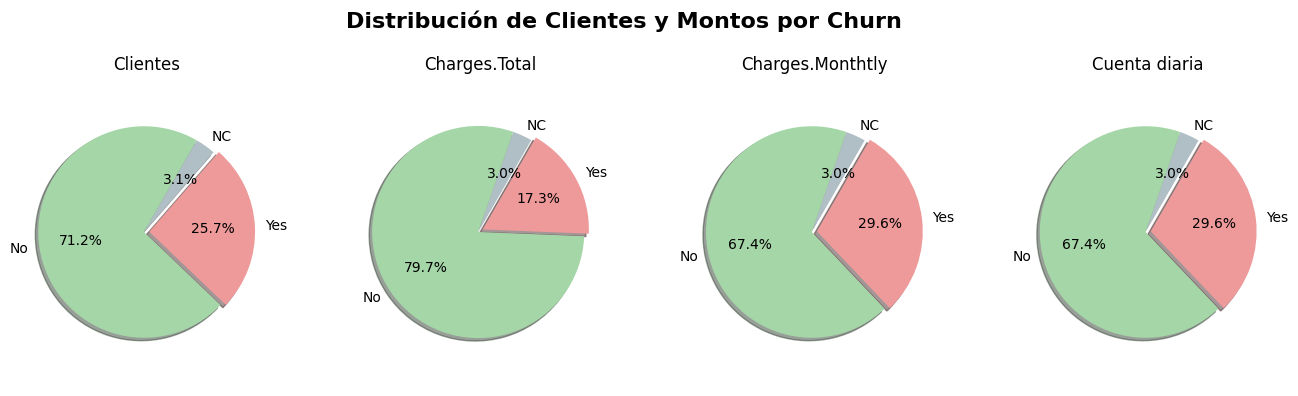

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico 1: Distribución de clientes por Churn
valores_clientes = df_normalizado['Churn'].value_counts()
etiquetas_clientes = valores_clientes.index
porcentajes_clientes = valores_clientes.values

# Gráfico 2: Distribución de montos total por Churn
monto_x_churn = df_normalizado.groupby('Churn')['account.Charges.Total'].sum()
monto_total = monto_x_churn.sum()
porcentajes_montos = (monto_x_churn / monto_total) * 100
etiquetas_montos = porcentajes_montos.index

# Gráfico 3: Distribución monto mensual  por Churn
monto_x_churn_mn = df_normalizado.groupby('Churn')['account.Charges.Monthly'].sum()
monto_total_mn = monto_x_churn_mn.sum()
porcentajes_montos_mn = (monto_x_churn_mn / monto_total_mn) * 100
etiquetas_montos_mn = porcentajes_montos_mn.index

# Gráfico 4: Distribución monto mensual  por Churn
monto_x_churn_cd = df_normalizado.groupby('Churn')['Cuentas_Diarias'].sum()
monto_total_cd = monto_x_churn_cd.sum()
porcentajes_montos_cd = (monto_x_churn_cd / monto_total_cd) * 100
etiquetas_montos_cd = porcentajes_montos_cd.index

# Funcion para colores
def obtener_colores(etiquetas):
    colores = []
    for etiqueta in etiquetas:
        if etiqueta == 'No':
            colores.append('#A5D6A7')  # Verde
        elif etiqueta == 'Yes':
            colores.append('#EF9A9A')  # Rojo
        elif etiqueta == 'NC':
            colores.append('#B0BEC5')  # Gris
        else:
            colores.append('#90A4AE')  # Fallback
    return colores

colores_clientes = obtener_colores(etiquetas_clientes)
colores_montos = obtener_colores(etiquetas_montos)

# Explode para destacar 'Yes'
explode_clientes = [0.05 if e == 'Yes' else 0 for e in etiquetas_clientes]
explode_montos = [0.05 if e == 'Yes' else 0 for e in etiquetas_montos]

# Crear graficos
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Subplot 1: Clientes por Churn
axs[0].pie(
    porcentajes_clientes,
    labels=etiquetas_clientes,
    colors=colores_clientes,
    autopct='%1.1f%%',
    startangle=60,
    shadow=True, explode=explode_clientes
)
axs[0].axis('equal')
axs[0].set_title('Clientes')

# Subplot 2: Montos Total por Churn
axs[1].pie(
    porcentajes_montos,
    labels=etiquetas_montos,
    colors=colores_montos,
    autopct='%1.1f%%',
    startangle=60,
    shadow=True, explode=explode_montos
)
axs[1].axis('equal')
axs[1].set_title('Charges.Total')

# Subplot 3: Monto Mensual por Churn
axs[2].pie(
    porcentajes_montos_mn,
    labels=etiquetas_montos_mn,
    colors=colores_montos,
    autopct='%1.1f%%',
    startangle=60,
    shadow=True, explode=explode_montos
)
axs[2].axis('equal')
axs[2].set_title('Charges.Monthtly')

# Subplot 3: Carga diaria por Churn
axs[3].pie(
    porcentajes_montos_cd,
    labels=etiquetas_montos_cd,
    colors=colores_montos,
    autopct='%1.1f%%',
    startangle=60,
    shadow=True, explode=explode_montos
)
axs[3].axis('equal')
axs[3].set_title('Cuenta diaria')

plt.suptitle('Distribución de Clientes y Montos por Churn \n', fontsize=16, fontweight='bold',y=1.05)
plt.subplots_adjust(wspace=0.4)
plt.savefig("distribucion_clientes_churn.png")
plt.show()



In [240]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7267 non-null   string 
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   bool   
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   string 
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    7267 non-null   string 
 11  internet.OnlineBackup      7267 non-null   string 
 12  internet.DeviceProtection  7267 non-null   string 
 13  internet.TechSupport       7267 non-null   strin

In [241]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7267 non-null   string 
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   bool   
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   string 
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    7267 non-null   string 
 11  internet.OnlineBackup      7267 non-null   string 
 12  internet.DeviceProtection  7267 non-null   string 
 13  internet.TechSupport       7267 non-null   strin

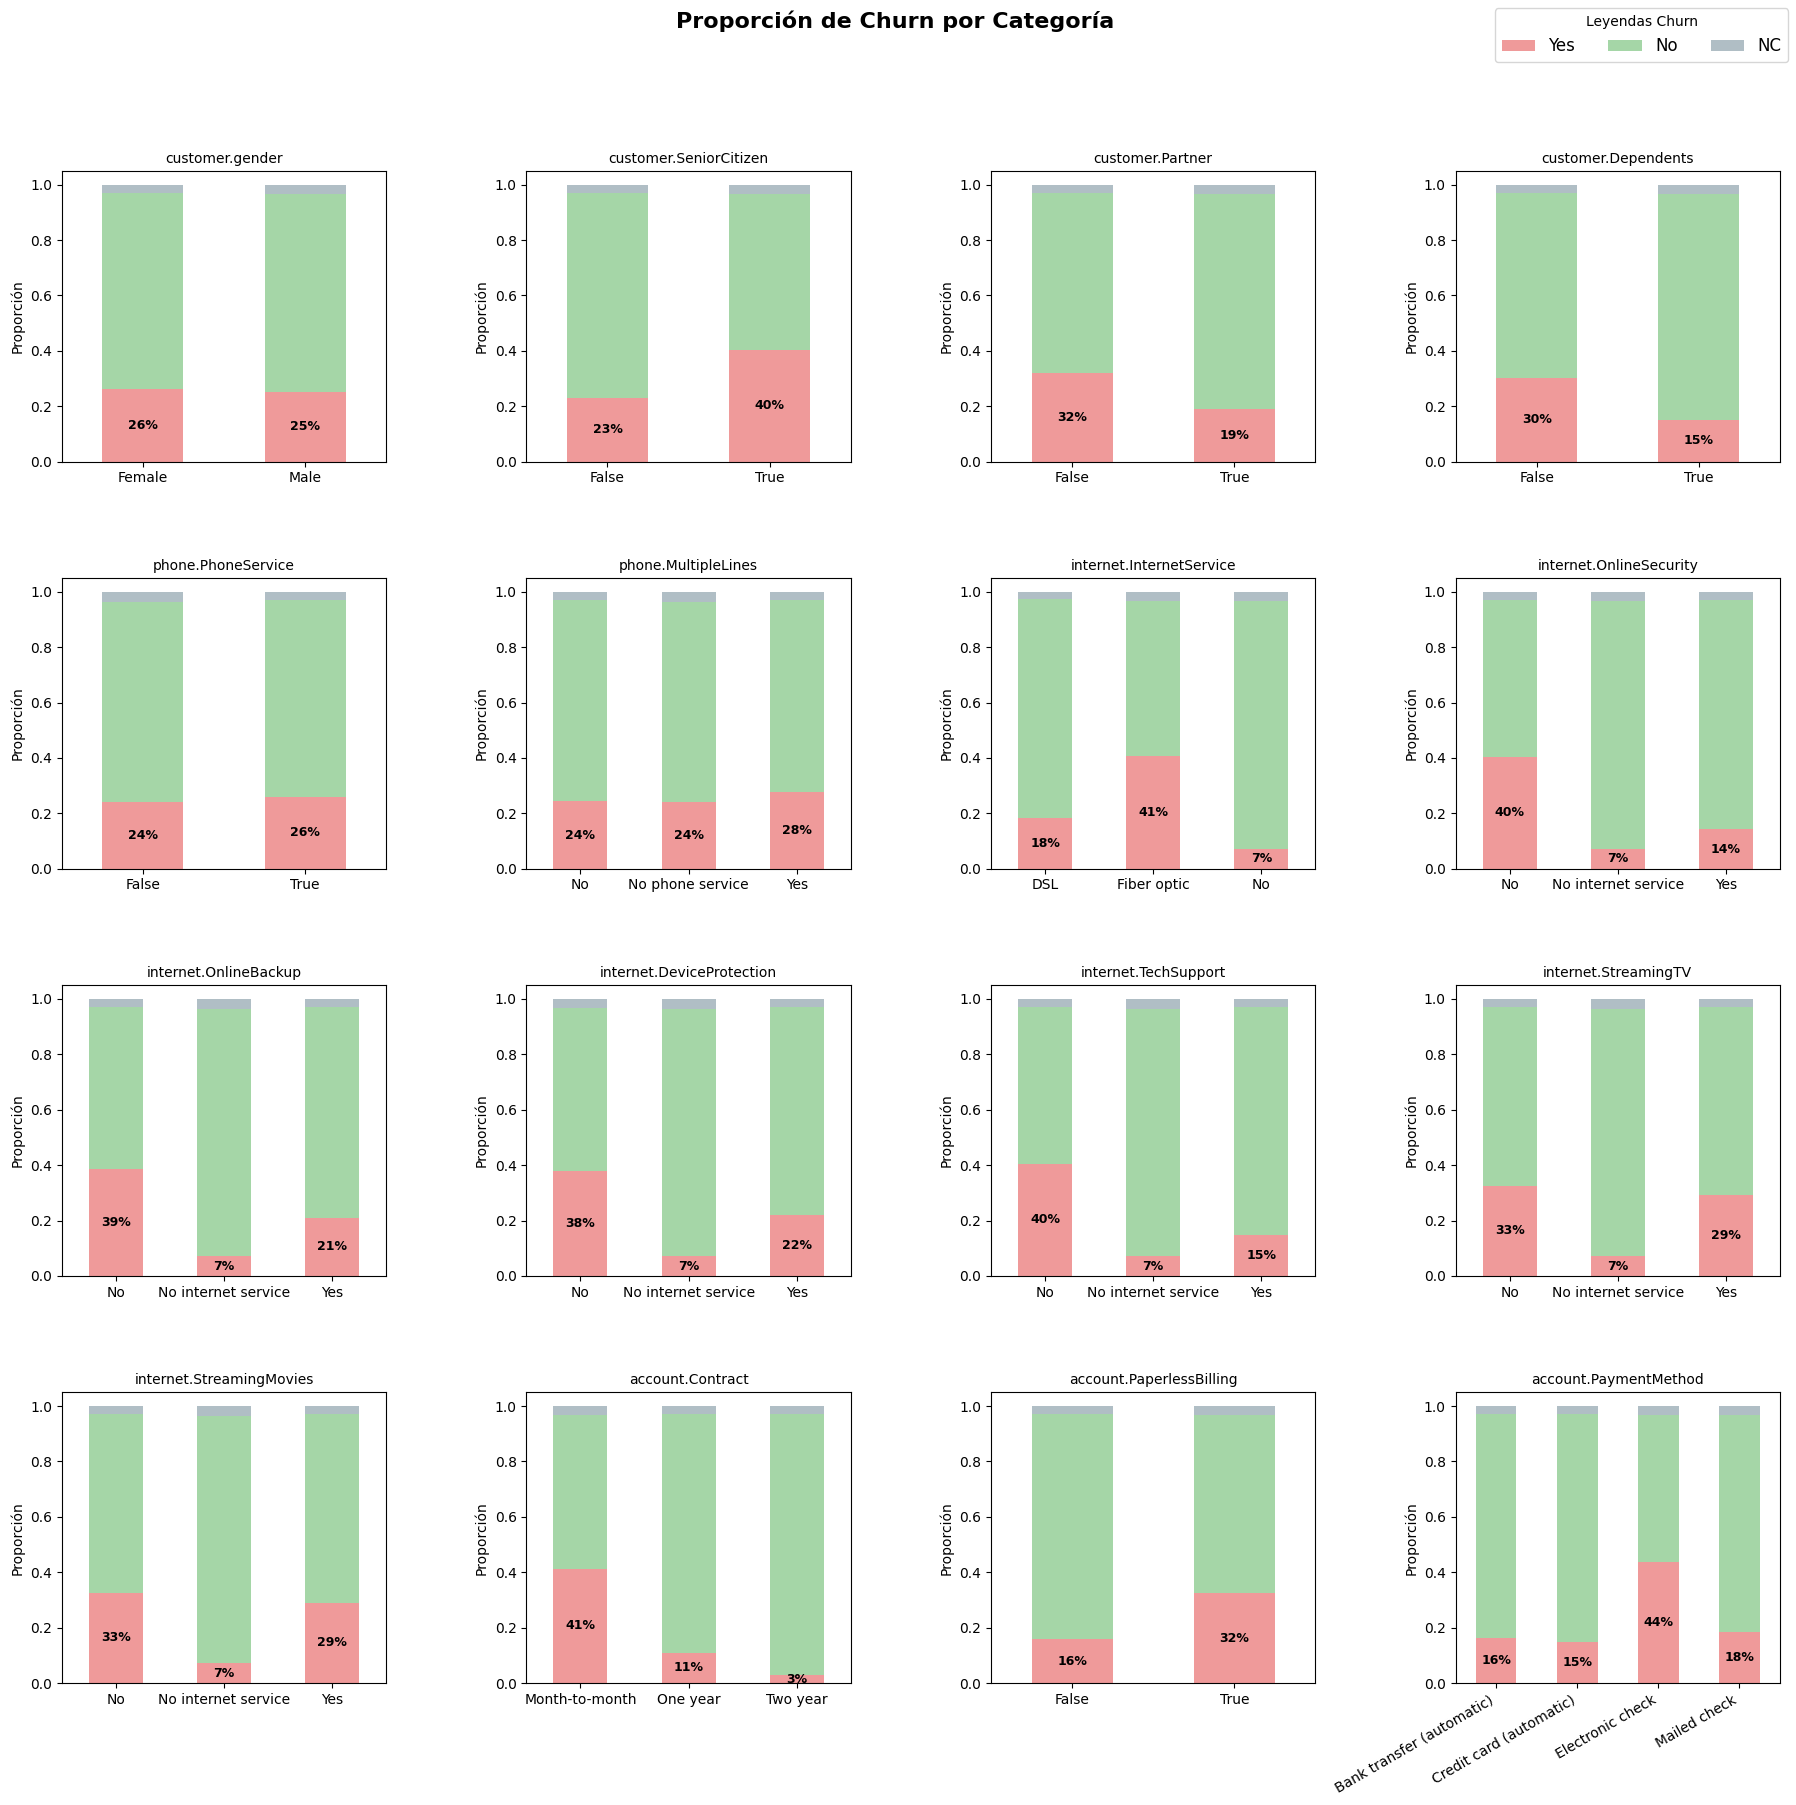

In [242]:
#Grafica para recuento de evasión por variable categorica
import matplotlib.pyplot as plt

# Lista de columnas categóricas
columnas_categoricas = [
    'customer.gender', 'customer.SeniorCitizen', 'customer.Partner',
    'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
    'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling',
    'account.PaymentMethod'
]

# Crear subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))
axes = axes.flatten()


# Colores definidos
colores_churn = {
    'Yes': '#EF9A9A',  # rojo suave
    'No': '#A5D6A7',   # verde suave
    'NC': '#B0BEC5'    # gris suave
}

# Iterar sobre las columnas
for i, col in enumerate(columnas_categoricas):
    prop = (df_normalizado.groupby(col)['Churn']
              .value_counts(normalize=True)
              .unstack()#lo transforma en columna
              .fillna(0))

    # Graficar
    prop[['Yes', 'No', 'NC']].plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        color=[colores_churn['Yes'], colores_churn['No'], colores_churn['NC']],
        legend=False
    )

    axes[i].set_title(col, fontsize=10)
    axes[i].set_ylabel('Proporción')
    axes[i].set_xlabel('')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    for tick in axes[15].get_xticklabels():
      tick.set_rotation(30)
      tick.set_ha('right')



    # Agregar etiqueta de porcentaje para 'Yes'
    for idx, categoria in enumerate(prop.index):
        porcentaje_yes = prop.loc[categoria, 'Yes']
        if porcentaje_yes > 0:
            axes[i].text(
                x=idx,
                y=porcentaje_yes / 2,
                s=f"{porcentaje_yes:.0%}",
                ha='center',
                va='center',
                fontsize=9,
                color='black',
                fontweight='bold'
            )

# Eliminar subplots vacíos si hay menos de 16
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Agregar leyenda global
fig.legend(labels=['Yes', 'No', 'NC'], loc='upper right', ncol=3, fontsize=12, title='Leyendas Churn')

# Ajustar espaciado general
plt.suptitle('Proporción de Churn por Categoría', fontsize=16, fontweight='bold',y=1.05)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.subplots_adjust(hspace=0.4)

plt.savefig("proporcion_churn_categoria.png")

plt.show()



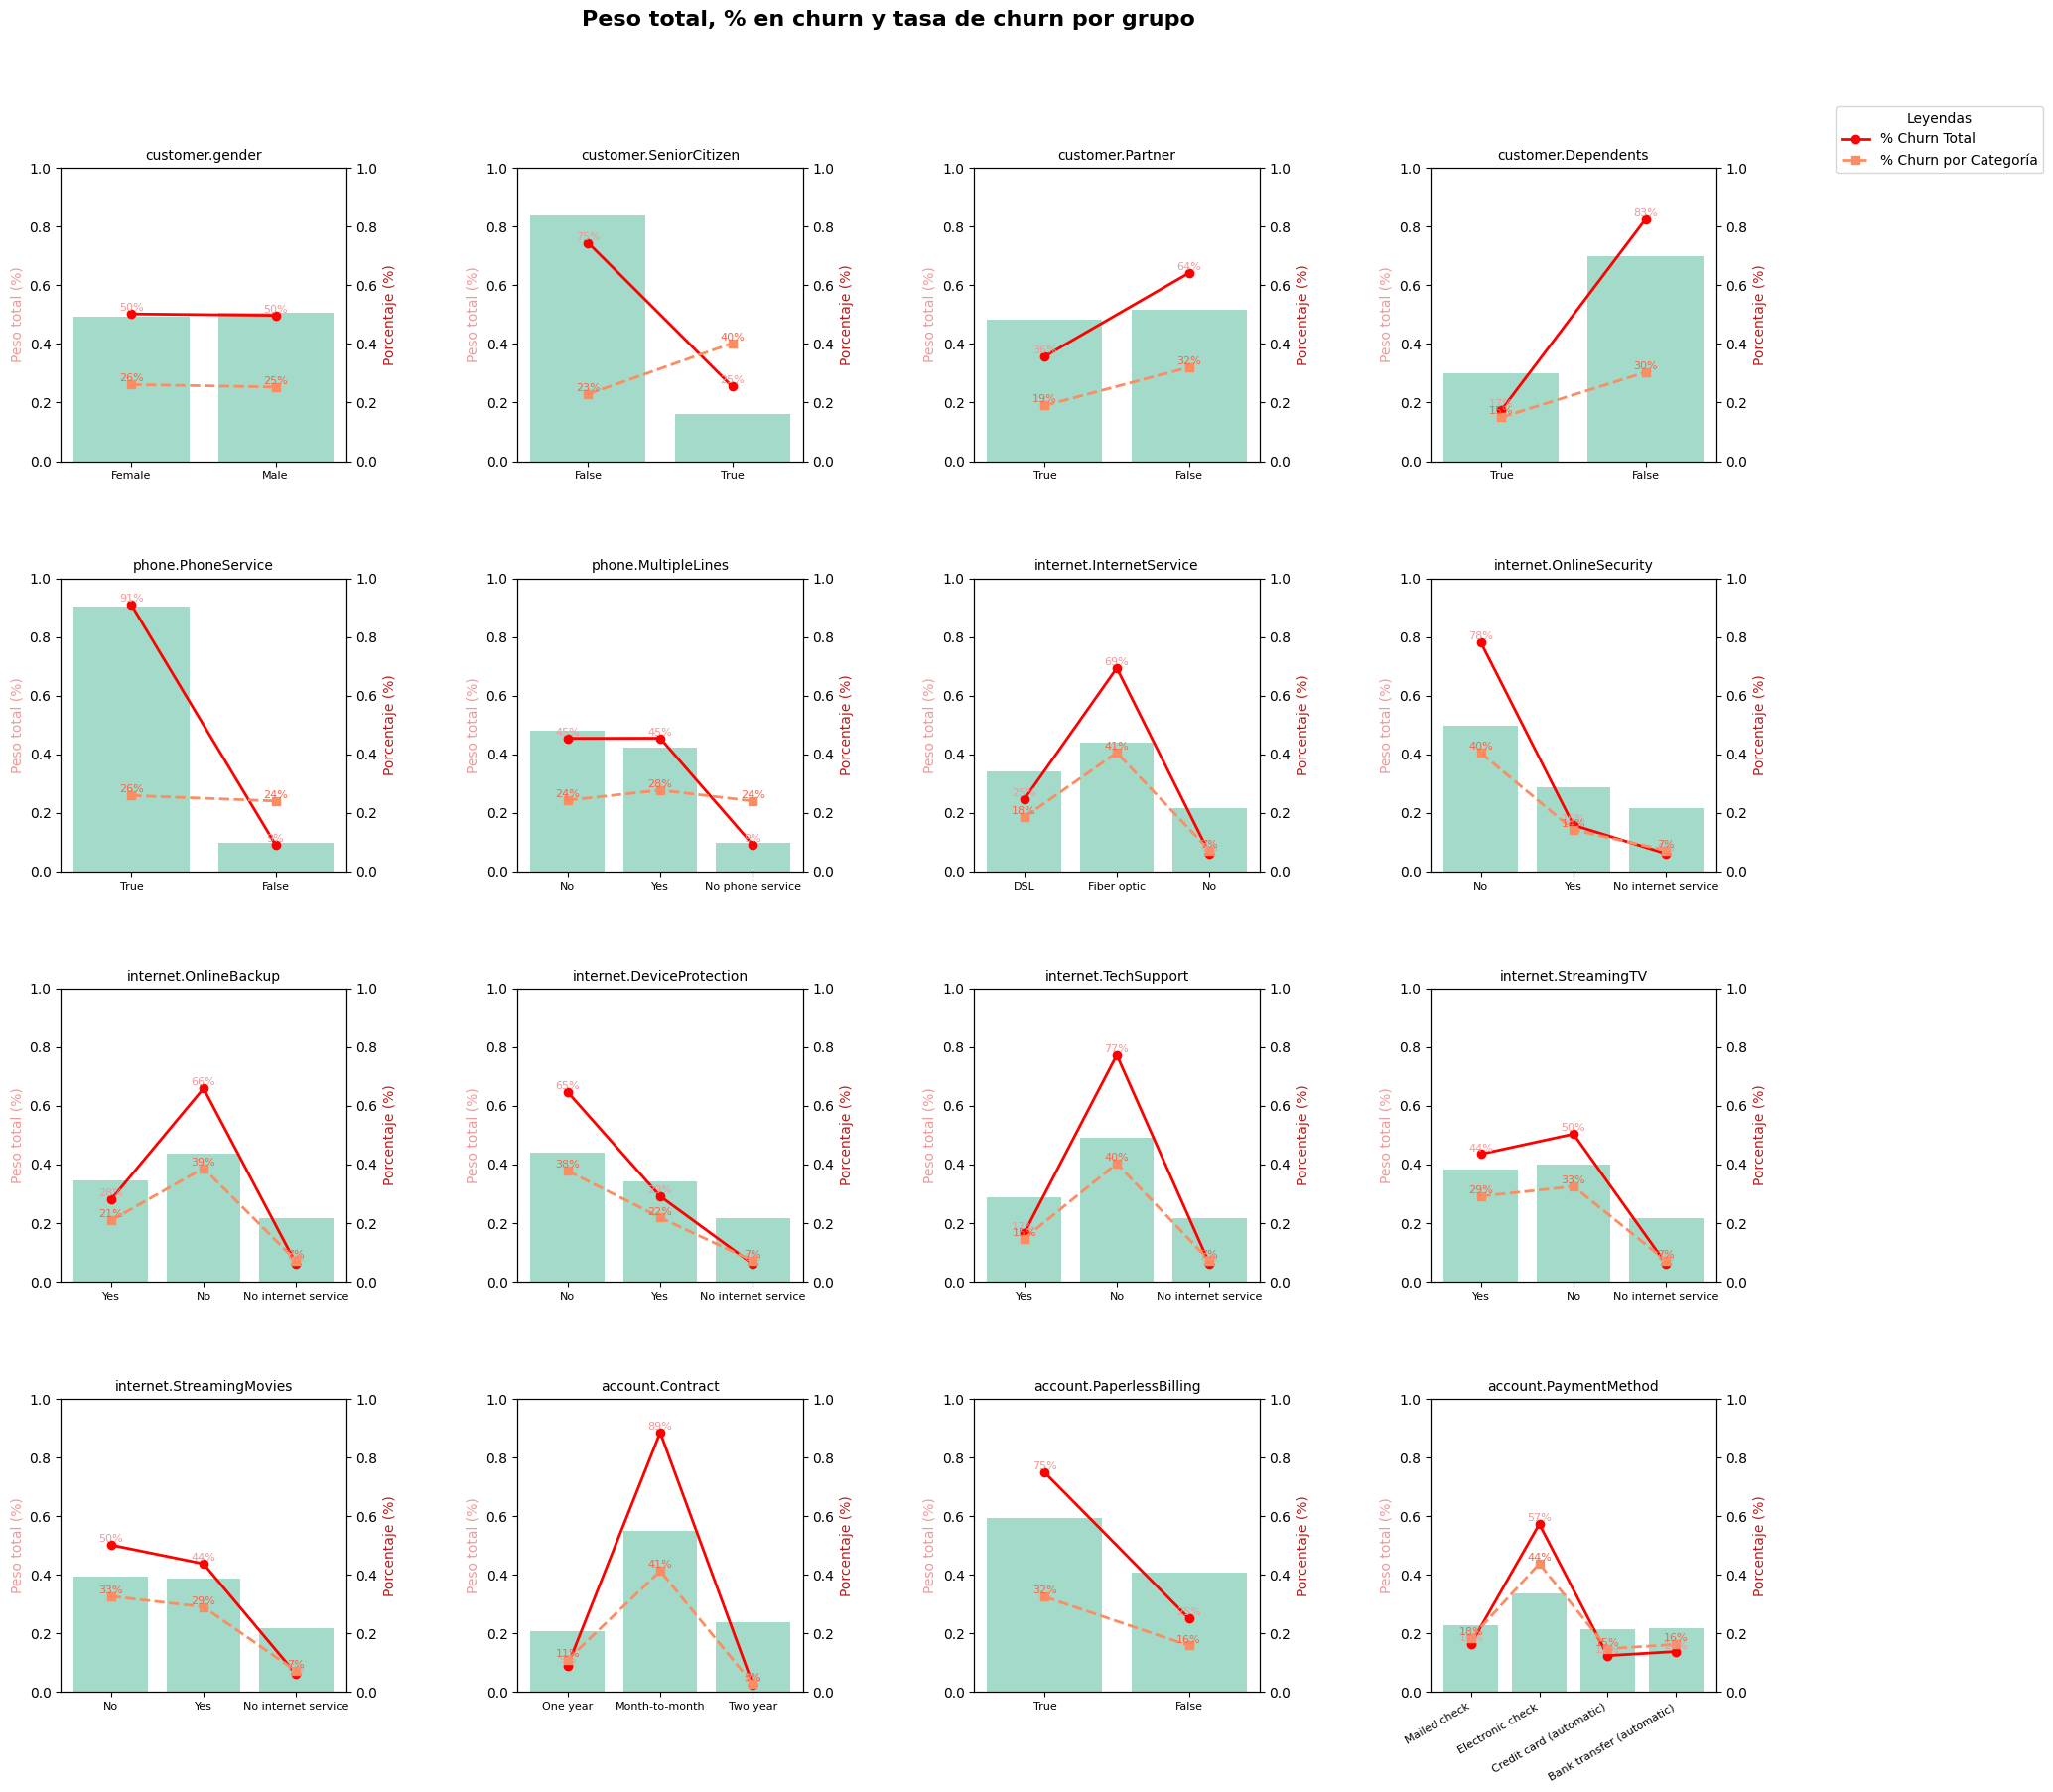

In [243]:
# Lista de columnas categóricas
columnas_categoricas = [
    'customer.gender', 'customer.SeniorCitizen', 'customer.Partner',
    'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
    'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling',
    'account.PaymentMethod'
]

palette = sns.color_palette("Set2", n_colors=3)

# Crear figura con subplots 4x4
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))
axes = axes.flatten()

# Filtrar clientes con churn = 'Yes'
df_churn = df_normalizado[df_normalizado['Churn'] == 'Yes']

# Inicializar handles para la leyenda
linea_roja_handle = None
linea_naranja_handle = None

# Iterar sobre columnas categóricas
for i, col in enumerate(columnas_categoricas):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    categorias = df_normalizado[col].dropna().unique()

    peso_total = df_normalizado[col].value_counts(normalize=True).reindex(categorias, fill_value=0)
    tasa_en_churn = df_churn[col].value_counts(normalize=True).reindex(categorias, fill_value=0)
    tasa_en_categoria = (df_churn[col].value_counts() / df_normalizado[col].value_counts()).reindex(categorias, fill_value=0)

    # Gráficos
    ax1.bar(peso_total.index.astype(str), peso_total.values, color=palette[0], alpha=0.6)
    #ax1.bar(peso_total.index.astype(str), peso_total.values, color='#90caf9', alpha=0.6)
    linea_roja, = ax2.plot(tasa_en_churn.index.astype(str), tasa_en_churn.values,
                           color='red', marker='o', linewidth=2)
    linea_naranja, = ax2.plot(tasa_en_categoria.index.astype(str), tasa_en_categoria.values,
                              color=palette[1], marker='s', linestyle='--', linewidth=2)

    # Guardar handles una sola vez
    if linea_roja_handle is None:
        linea_roja_handle = linea_roja
    if linea_naranja_handle is None:
        linea_naranja_handle = linea_naranja

    # Etiquetas condicionales
    for j, (x_val, y_val) in enumerate(zip(tasa_en_churn.index.astype(str), tasa_en_churn.values)):
        if pd.notna(y_val) and y_val > 0:
            ax2.text(j, y_val + 0.01, f"{y_val:.0%}", color='#EF9A9A', ha='center', fontsize=8)

    for j, (x_val, y_val) in enumerate(zip(tasa_en_categoria.index.astype(str), tasa_en_categoria.values)):
        if pd.notna(y_val) and y_val > 0:
            ax2.text(j, y_val + 0.01, f"{y_val:.0%}", color='tomato', ha='center', fontsize=8)

    ax1.set_title(col, fontsize=10)
    ax1.set_ylabel('Peso total (%)', color='#EF9A9A')
    ax2.set_ylabel('Porcentaje (%)', color='#b71c1c')
    ax1.set_xticks(range(len(peso_total.index)))
    ax1.set_xticklabels(peso_total.index.astype(str), rotation=0, fontsize=8)

    if i == 15:
        for tick in ax1.get_xticklabels():
            tick.set_rotation(30)
            tick.set_ha('right')

    ax1.set_ylim(0, 1)
    ax2.set_ylim(0, 1)

# Título general
plt.suptitle("Peso total, % en churn y tasa de churn por grupo", fontsize=16, fontweight='bold', y=1.05)

# Agregar leyenda global (fuera del área de subplots)
fig.legend(
    handles=[linea_roja_handle, linea_naranja_handle],
    labels=['% Churn Total', '% Churn por Categoría'],
    loc='upper right',
    bbox_to_anchor=(1.15, 1),
    fontsize=10,
    title='Leyendas'
)

# Ajustes visuales
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.subplots_adjust(hspace=0.4, wspace=0.6)

plt.savefig("Peso_total_cliente_y_churn.png")

plt.show()




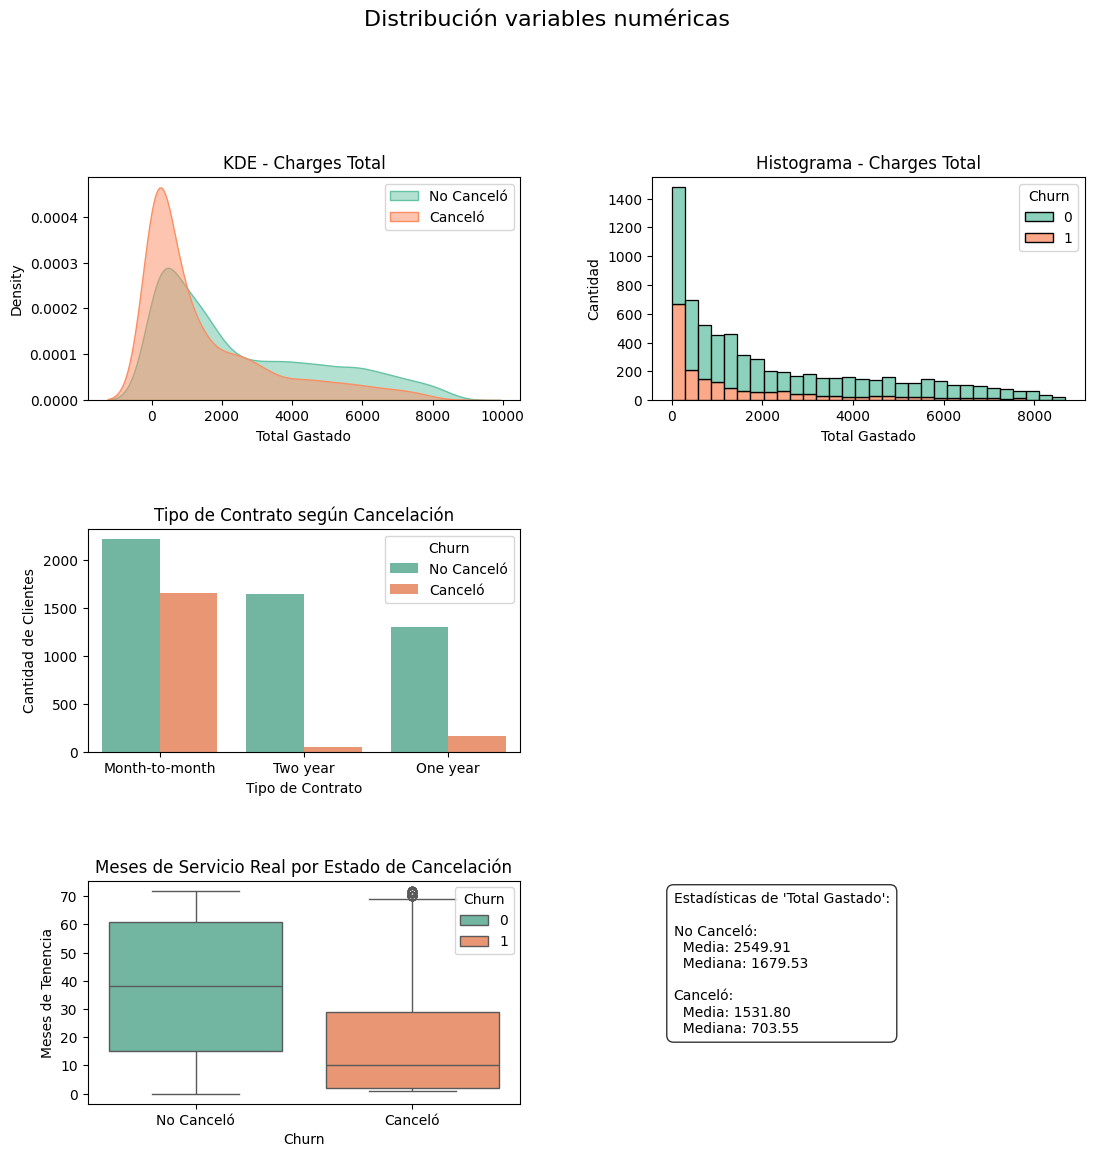

In [244]:
# Paleta de colores predefinida
palette = sns.color_palette("Set2", n_colors=2)
df_filtrado = df_normalizado[df_normalizado['Churn'].isin(['Yes', 'No'])].copy()
df_filtrado['Churn'] = df_filtrado['Churn'].map({'No': 0, 'Yes': 1})


# Definimos subplots (3 filas x 2 columnas)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# --- 1. KDE para account.Charges.Total ---
sns.kdeplot(data=df_filtrado[df_filtrado['Churn'] == 0], x='account.Charges.Total',  label='No Canceló', fill=True, alpha=0.5, ax=axes[0, 0], color=palette[0])
sns.kdeplot(data=df_filtrado[df_filtrado['Churn'] == 1], x='account.Charges.Total',  label='Canceló',    fill=True, alpha=0.5, ax=axes[0, 0], color=palette[1])
axes[0, 0].set_title('KDE - Charges Total')
axes[0, 0].set_xlabel('Total Gastado')
axes[0, 0].legend()

# --- 1.b Histograma para account.Charges.Total ---
sns.histplot(data=df_filtrado, x='account.Charges.Total', hue='Churn',bins=30,multiple='stack',palette=palette, ax=axes[0, 1])
axes[0, 1].set_title('Histograma - Charges Total')
axes[0, 1].set_xlabel('Total Gastado')
axes[0, 1].set_ylabel('Cantidad')

# --- 2. Countplot para account.Contract ---
orden_contratos = df_filtrado['account.Contract'].value_counts().index
sns.countplot(data=df_filtrado,x='account.Contract',hue='Churn',order=orden_contratos,ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Tipo de Contrato según Cancelación')
axes[1, 0].set_xlabel('Tipo de Contrato')
axes[1, 0].set_ylabel('Cantidad de Clientes')
axes[1, 0].legend(title='Churn', labels=['No Canceló', 'Canceló'])

# --- 2.b Celda vacía (sin gráfico)
axes[1, 1].axis('off')

# --- 3. Boxplot para customer.tenure ---
sns.boxplot(x='Churn', y='customer.tenure', data=df_filtrado, ax=axes[2, 0],hue='Churn', palette=palette)
axes[2, 0].set_title('Meses de Servicio Real por Estado de Cancelación')
axes[2, 0].set_xlabel('Churn')
axes[2, 0].set_ylabel('Meses de Tenencia')
axes[2, 0].set_xticks([0, 1])
axes[2, 0].set_xticklabels(['No Canceló', 'Canceló'])

# --- Calcular media y mediana para 'account.Charges.Total' ---
promedio_total_charge_no_churn = df_filtrado[df_filtrado['Churn'] == 0]['account.Charges.Total'].mean()
mediana_total_charge_no_churn = df_filtrado[df_filtrado['Churn'] == 0]['account.Charges.Total'].median()

promedio_total_charge_churn = df_filtrado[df_filtrado['Churn'] == 1]['account.Charges.Total'].mean()
mediana_total_charge_churn = df_filtrado[df_filtrado['Churn'] == 1]['account.Charges.Total'].median()

# Crear cadenas de texto para las estadísticas, ahora con saltos de línea
text_stats = (
    f"Estadísticas de 'Total Gastado':\n\n"
    f"No Canceló:\n"
    f"  Media: {promedio_total_charge_no_churn:.2f}\n"
    f"  Mediana: {mediana_total_charge_no_churn:.2f}\n\n"
    f"Canceló:\n"
    f"  Media: {promedio_total_charge_churn:.2f}\n"
    f"  Mediana: {mediana_total_charge_churn:.2f}"
)

# Añadir el recuadro de texto a la celda vacía (axes[2, 1])
axes[2, 1].text(0.05, 0.95, text_stats,
                 transform=axes[2, 1].transAxes, # Usa coordenadas relativas al eje de axes[2,1]
                 fontsize=10,
                 verticalalignment='top',
                 horizontalalignment='left',
                 bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black", lw=1, alpha=0.8))
# --- 3.b Celda vacía (sin gráfico)
axes[2, 1].axis('off')

# Título general
plt.suptitle('Distribución variables numéricas', fontsize=16, y=1)

# Ajustamos el espaciado
plt.tight_layout(pad=4.5)

plt.savefig("Distribucion_variables_numericas.png")
plt.show()

In [245]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7267 non-null   string 
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   bool   
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   string 
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    7267 non-null   string 
 11  internet.OnlineBackup      7267 non-null   string 
 12  internet.DeviceProtection  7267 non-null   string 
 13  internet.TechSupport       7267 non-null   strin

#Informe Final

#Informe Final – Análisis de Evasión de Clientes (Churn) – Telecom X

## 💠 Introducción


    Este análisis tiene como objetivo estudiar de cancelación de clientes (*churn*) en Telecom X, identificando características comunes entre los clientes que abandonan el servicio. Con esta información,  
    la empresa podrá diseñar estrategias efectivas de retención y fidelización.
    

--- 
## 💠 Limpieza y Tratamiento de Datos


    Para este analisis se realizaron las siguientes tareas de limpieza y tratamiento de datos:
    - Normalización de archivo json
    - Revisión general de los datos para verificar variables categóricas y numéricas.
    - Verificación de duplicados, vacios y nulos.
	      Valores vacios de la columna Charges.Total se cambian a 0 y se incluyen en el análisis (11 registros).
	      Valores vacíos de la columna Churn son modificados a 'NC' y se omiten del análisis, considerando que no se puede determinar el estado del cliente y que tiene un peso del 3% en la base de clientes que estamos   
        analizando (244 registros).
    - Cambiar tipos de datos para facilitar el análisis.
    - Verificación de datos atípicos.
    - Creación columna Cuentas_Diarias.


--- 
## 💠 Analisis Distribución general de clientes


   *Insight:* Aunque el 25.7% de los clientes cancelaron, estos solo representan el 17.3% del total facturado.  En termino de facturación mensual y carga diaria es levemente superior, lo que indica montos de pago  
              superiores en estos casos.



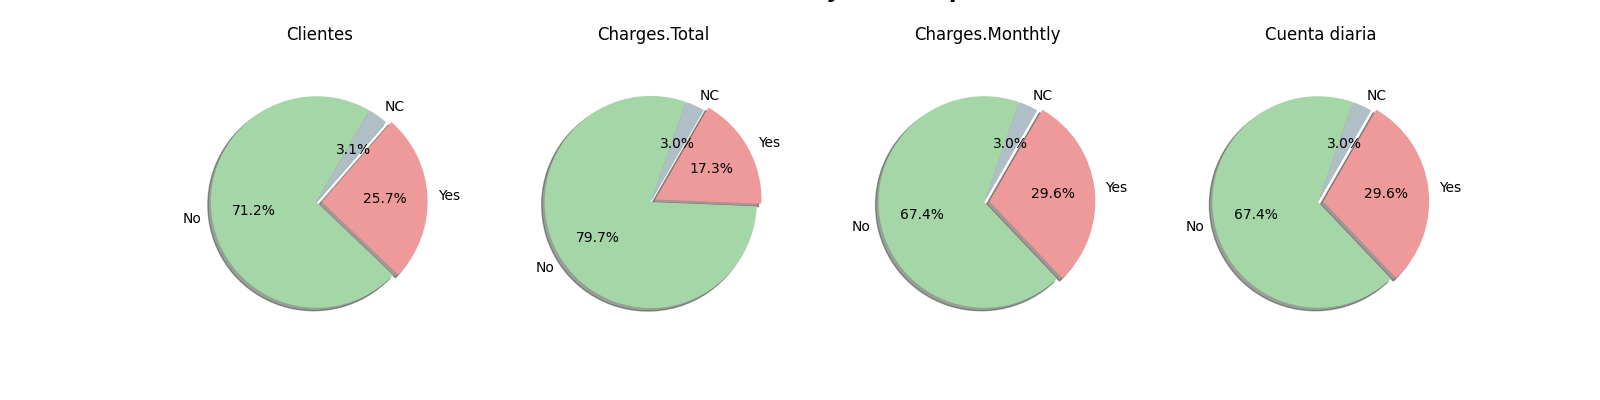

---
 ## 💠 Análisis Exploratorio de Datos (EDA)
### Peso Total de Clientes y Tasa de Churn por Categoría



    Columnas : % clientes sobre la base total.  Permite conocer el peso de dicha clasificación sobre el total de clientes de la base analizada.
    Linea naranja: % de cliente Churn='Yes' sobre el total de clientes en dicha clasificación o columna.  Se agrega tambien una grafica de columans apiladas para aclarar este indicador.
    Linea roja: % cliente sobre el total de casos Churn='Yes'
    
   *Insight:* Se evaluaron todas las variables, a continuación se muestras aquellas que presentan un porcentaje de Churn superior al 25.7% que es la tasa general.:

    - customer.SeniorCitizen(True)
    - customer.Partner(False)
    - customer.Dependents(False)
    - internet.InternetService(Fiber optic)
    - internet.OnlineSecurity(No)
    - internet.OnlineBackup(No)
    - internet.DeviceProtection(No)
    - internet.TechSupport(No)
    - internet.StreamingTV(No)
    - internet.StreamingMovies(No)
    - account.Contract(Month-to-month)
    - account.PaperlessBilling(True)
    - account.PaymentMethod(Electronic check)





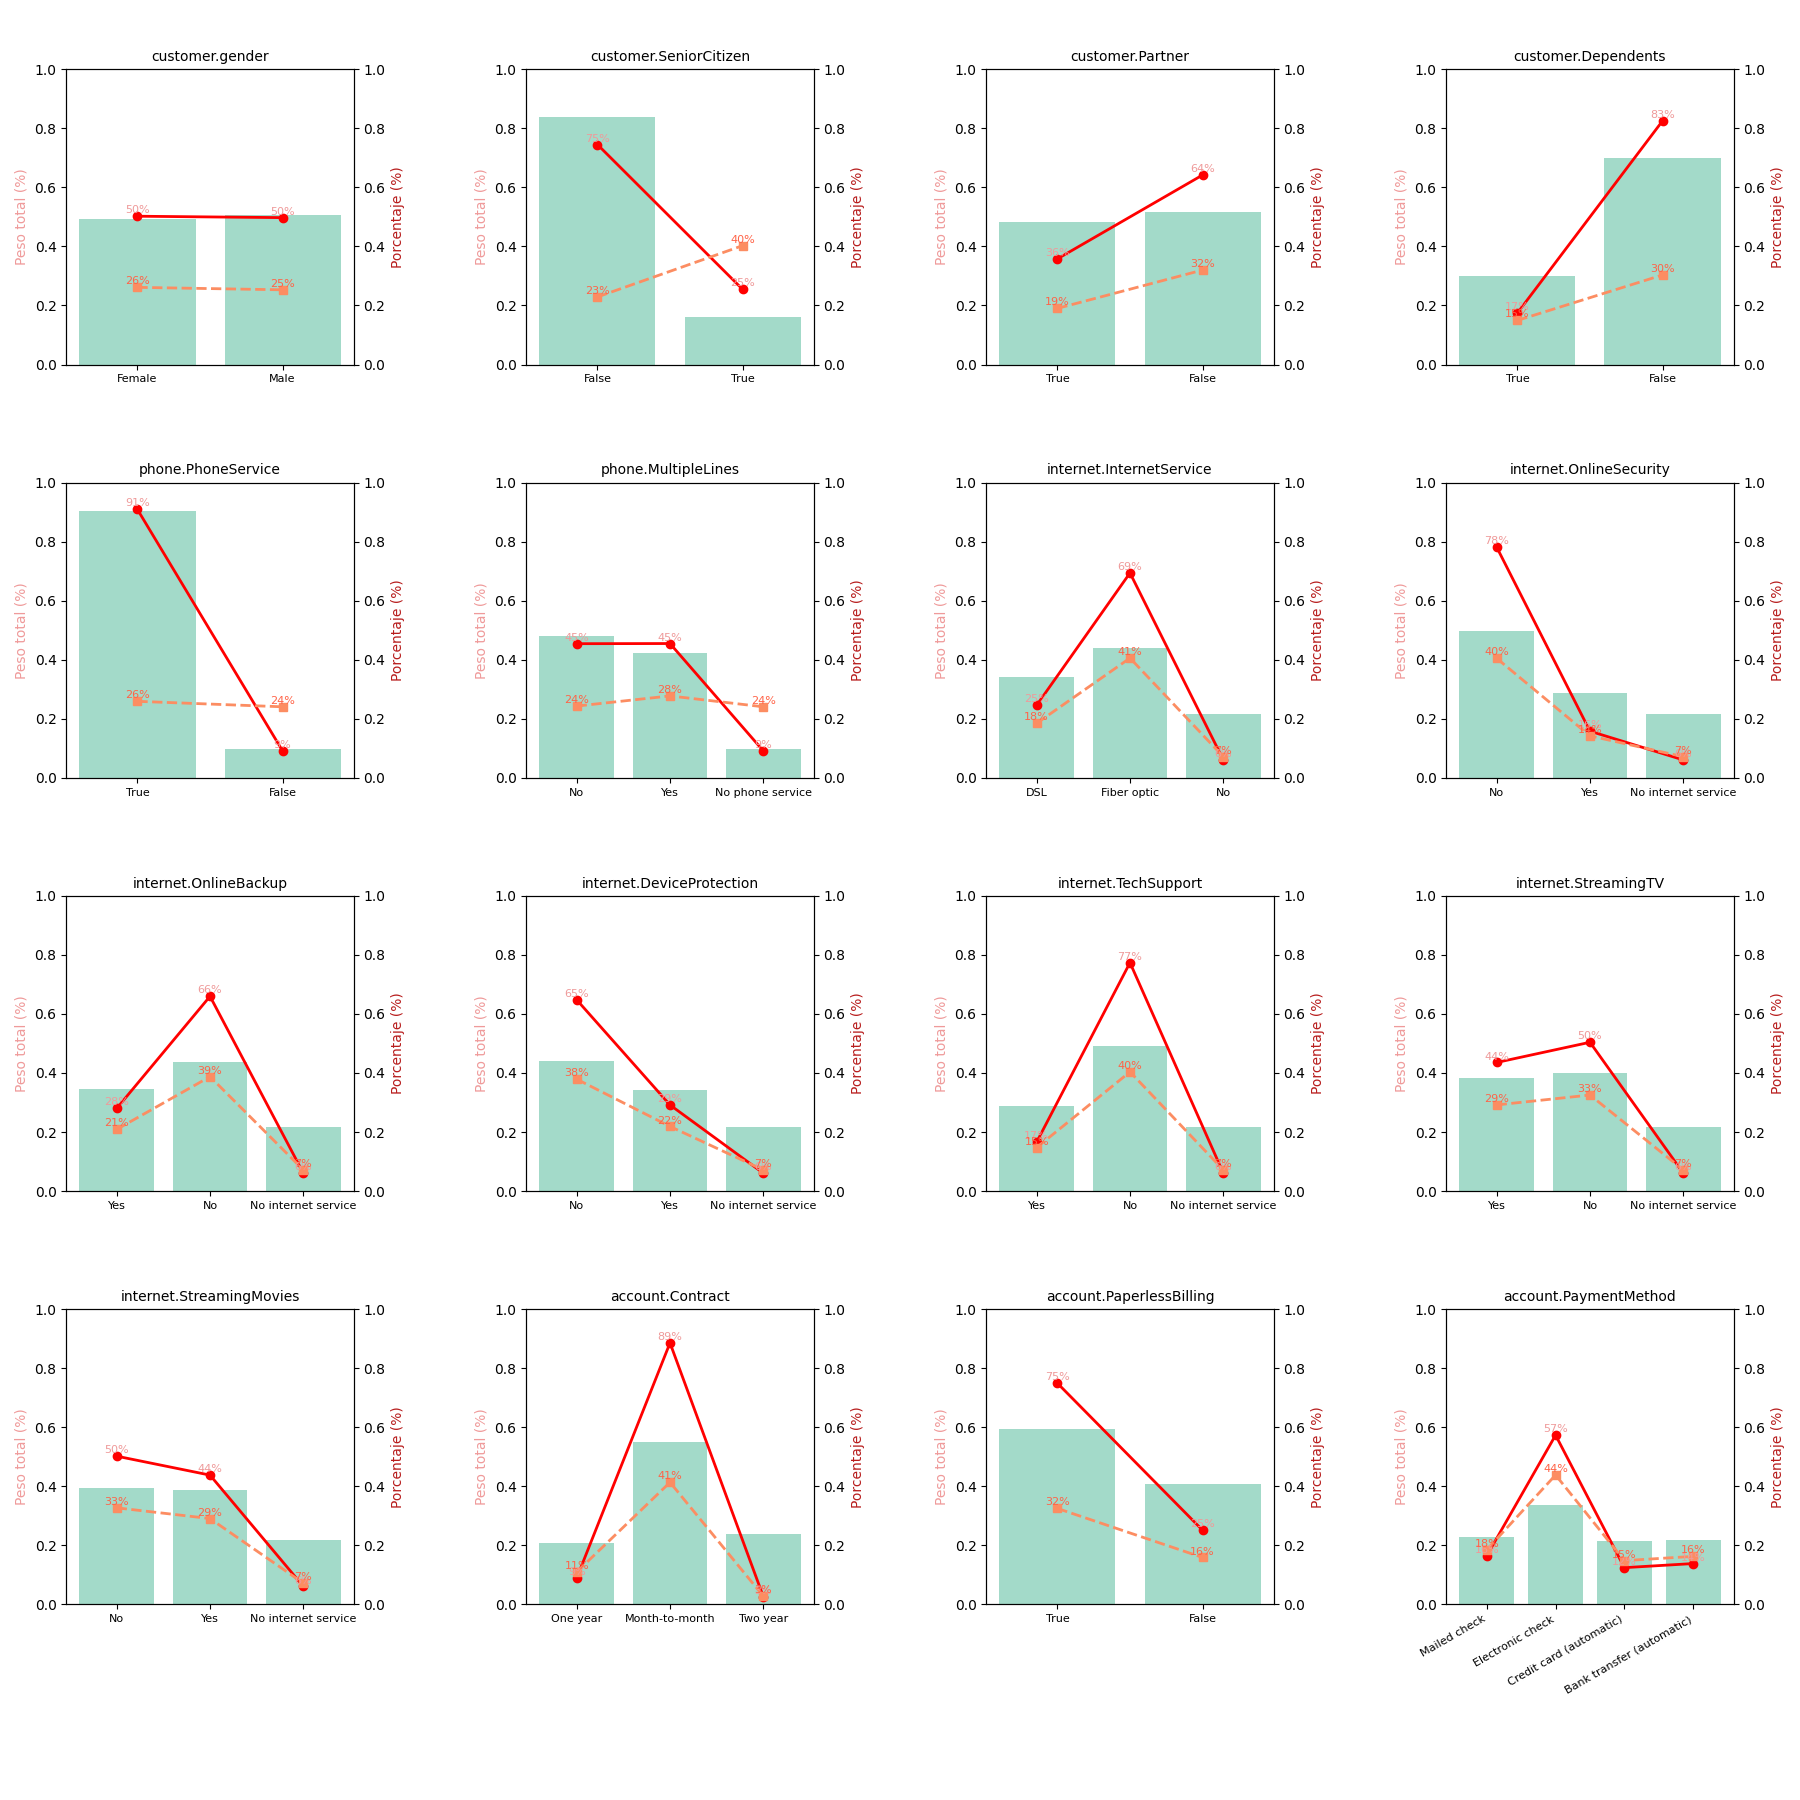

--- 
##💠 Analisis Proporción de Cancelación por Categoría


   *Insight:* Refuerza las variables observadas en el punto anterior.


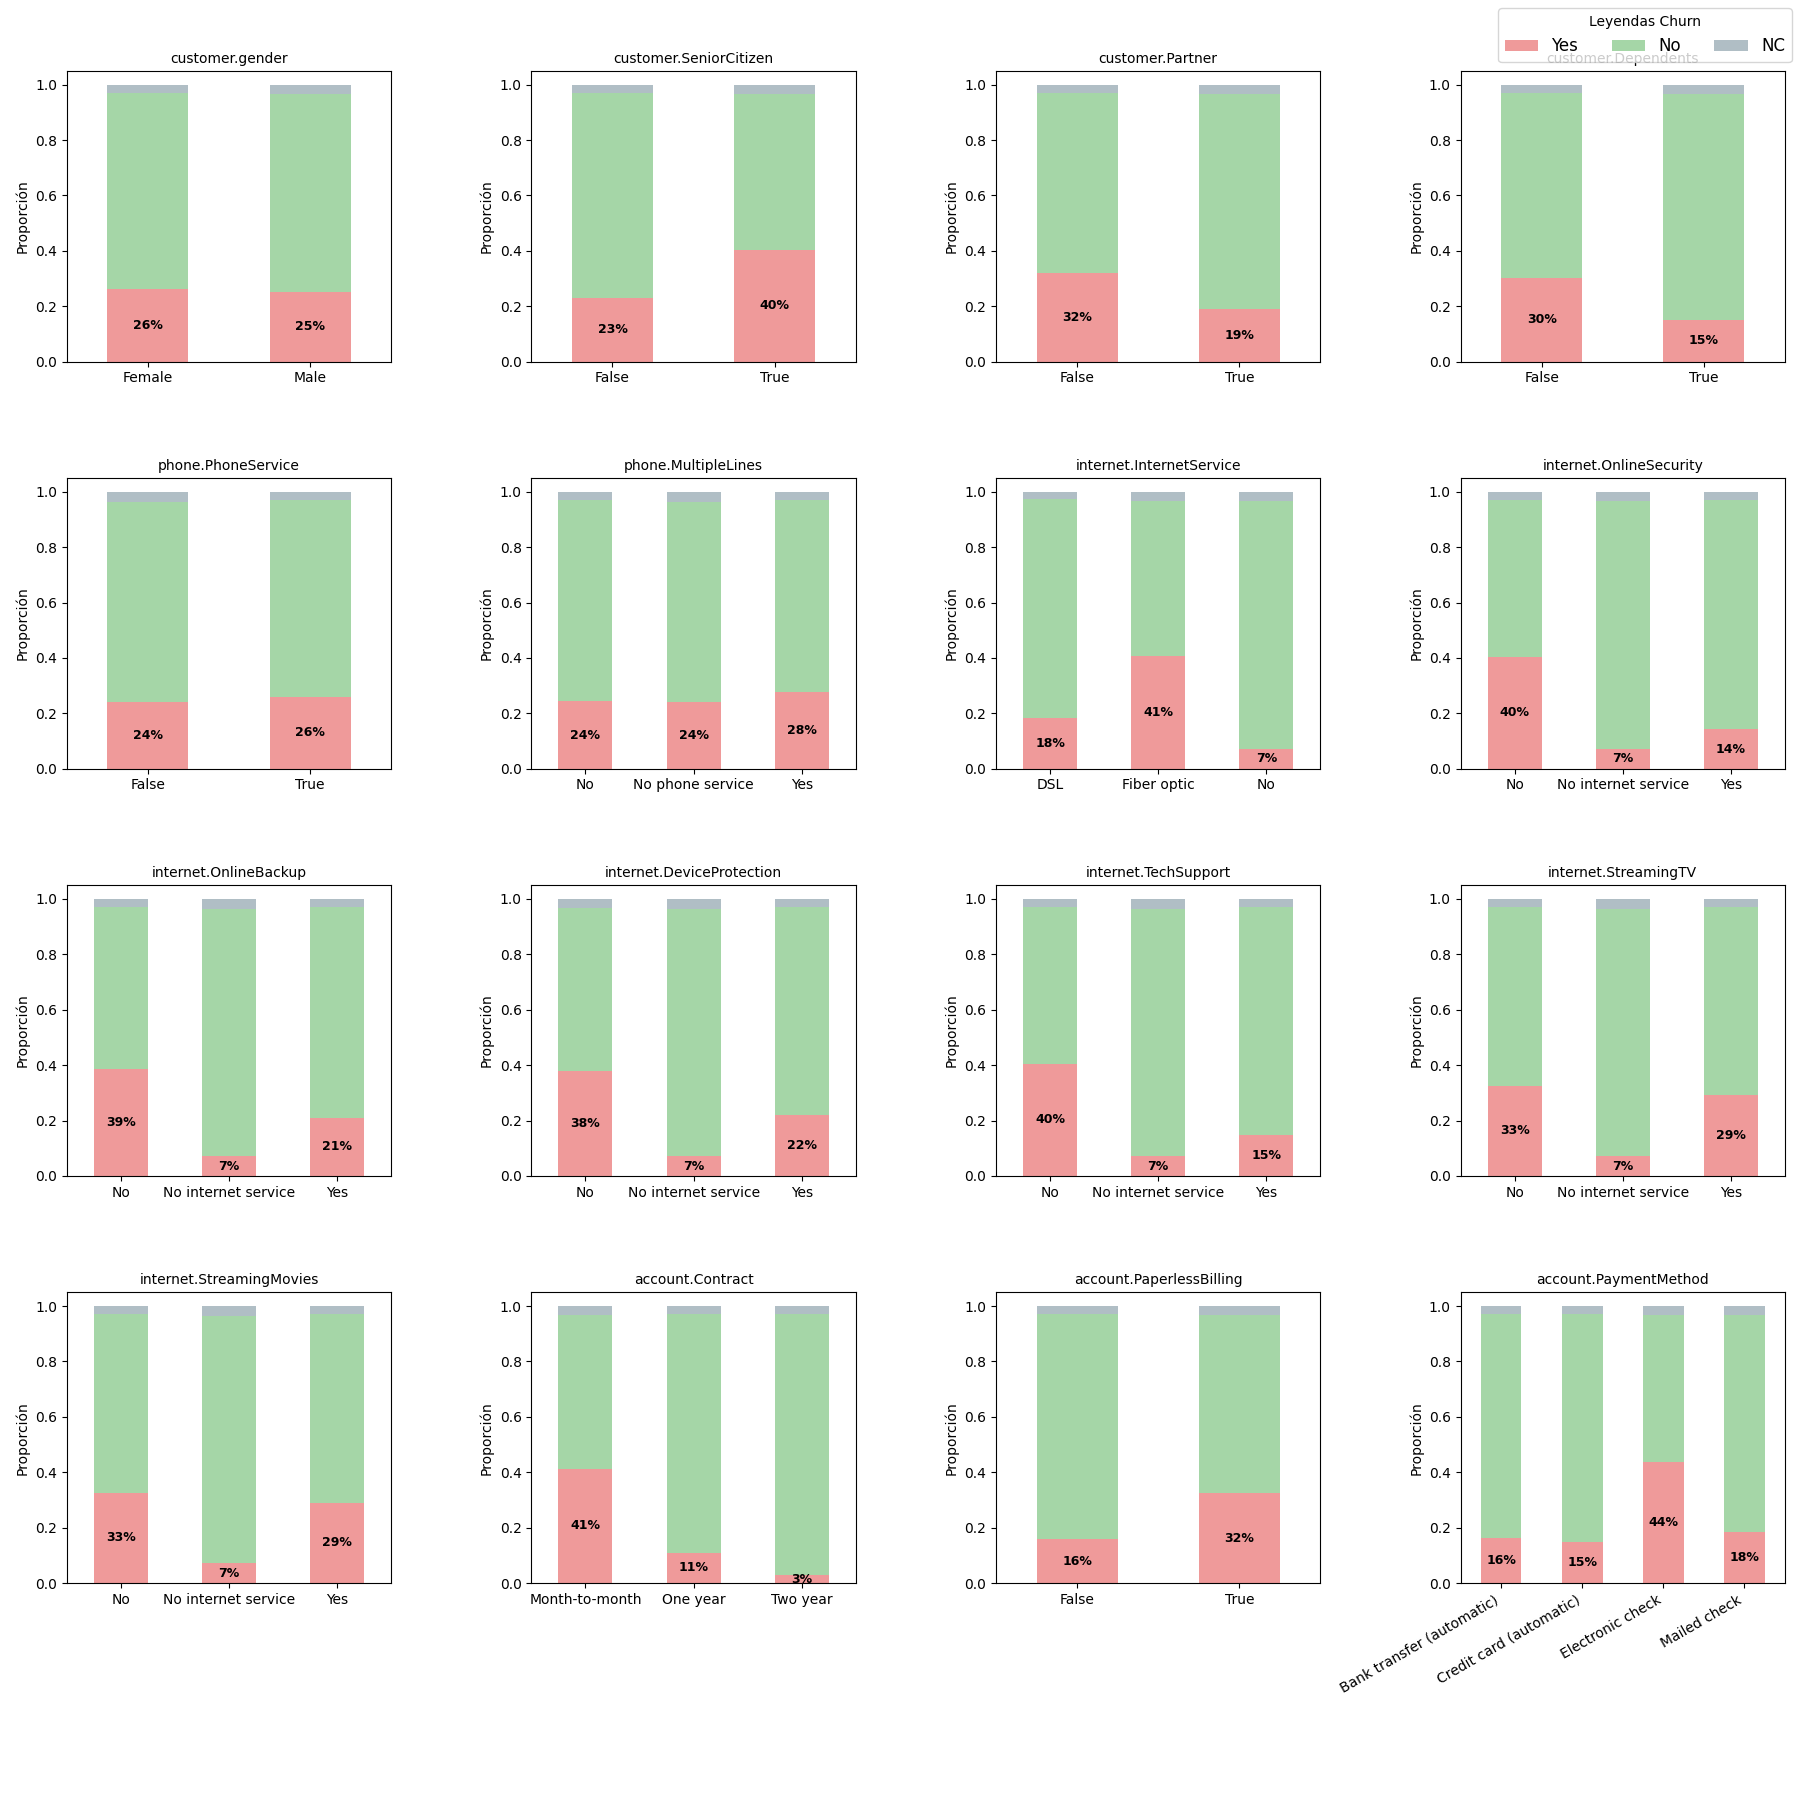

--- 
##💠 Distribución de Variables Numéricas


📌 *Insight:* 
    - Los clientes que cancelan son principalmente los que tienen contrato mes a mes.
    - Los clientes que cancelan permanecen una media de 10 meses aprox.  Lo que contrasta con los clientes que no cancelan su servicio que tienen una permanencia mucho mayor.


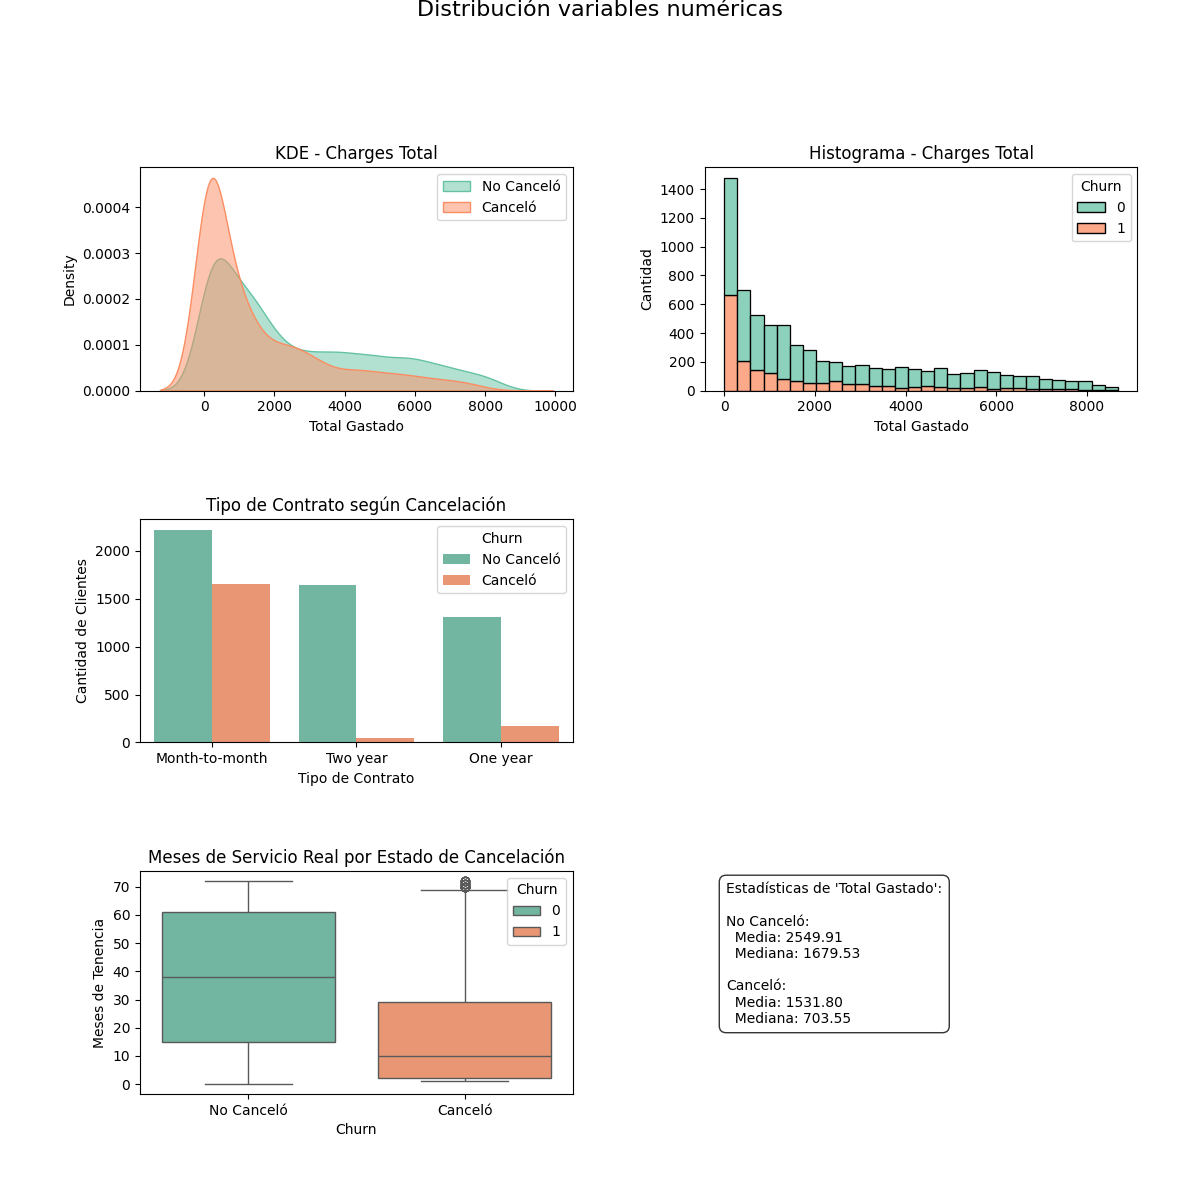

--- 
##💠 Conclusiones e Insights


- Clientes más antiguos tienen menor probabilidad de evasión del servicio.
- Contratos “Month-to-month” están fuertemente ligados al churn.
- Servicios adicionales reducen la probabilidad de evasión.
- Quienes pagan electrónicamente están en mayor riesgo.
- Los clientes Senior tienen mayor riesgo de Chur, pero representan una bajo porcentaje de la población de clientes.


--- 
##💠 Recomendaciones


- Incentivar contratos largos con descuentos o promociones.
- Incluir servicios adicionales gratis en los primeros meses, para incentivar su contratación y mejorar la tasa de permanencia.
- Activar alertas tempranas para clientes con bajo tenure o sin servicios adicionales.
- Evitar forzar facturación electrónica y ofrecer alternativas.
- Generar estrategias de retención en perfiles de alto riesgo como adultos mayores, pago electrónico y fibra optica.



In [246]:
import os
from IPython.display import display, Markdown, Image

# Lista del informe con contenido y ruta de imágenes
bloques_con_ancho_personalizado = [
    {"titulo": "#Informe Final – Análisis de Evasión de Clientes (Churn) – Telecom X", "texto": "", "imagen": None},



    {"titulo": "## 💠 Introducción", "texto": """
    Este análisis tiene como objetivo estudiar de cancelación de clientes (*churn*) en Telecom X, identificando características comunes entre los clientes que abandonan el servicio. Con esta información,
    la empresa podrá diseñar estrategias efectivas de retención y fidelización.
    """, "imagen": None},

    {"titulo": "--- \n## 💠 Limpieza y Tratamiento de Datos", "texto": """
    Para este analisis se realizaron las siguientes tareas de limpieza y tratamiento de datos:
    - Normalización de archivo json
    - Revisión general de los datos para verificar variables categóricas y numéricas.
    - Verificación de duplicados, vacios y nulos.
	      Valores vacios de la columna Charges.Total se cambian a 0 y se incluyen en el análisis (11 registros).
	      Valores vacíos de la columna Churn son modificados a 'NC' y se omiten del análisis, considerando que no se puede determinar el estado del cliente y que tiene un peso del 3% en la base de clientes que estamos
        analizando (244 registros).
    - Cambiar tipos de datos para facilitar el análisis.
    - Verificación de datos atípicos.
    - Creación columna Cuentas_Diarias.
""", "imagen": None},



    {"titulo": "--- \n## 💠 Analisis Distribución general de clientes", "texto": """
   *Insight:* Aunque el 25.7% de los clientes cancelaron, estos solo representan el 17.3% del total facturado.  En termino de facturación mensual y carga diaria es levemente superior, lo que indica montos de pago
              superiores en estos casos.

""", "imagen": "/content/distribucion_clientes_churn.png"},


    {"titulo": "---\n ## 💠 Análisis Exploratorio de Datos (EDA)\n### Peso Total de Clientes y Tasa de Churn por Categoría", "texto": """

    Columnas : % clientes sobre la base total.  Permite conocer el peso de dicha clasificación sobre el total de clientes de la base analizada.
    Linea naranja: % de cliente Churn='Yes' sobre el total de clientes en dicha clasificación o columna.  Se agrega tambien una grafica de columans apiladas para aclarar este indicador.
    Linea roja: % cliente sobre el total de casos Churn='Yes'

   *Insight:* Se evaluaron todas las variables, a continuación se muestras aquellas que presentan un porcentaje de Churn superior al 25.7% que es la tasa general.:

    - customer.SeniorCitizen(True)
    - customer.Partner(False)
    - customer.Dependents(False)
    - internet.InternetService(Fiber optic)
    - internet.OnlineSecurity(No)
    - internet.OnlineBackup(No)
    - internet.DeviceProtection(No)
    - internet.TechSupport(No)
    - internet.StreamingTV(No)
    - internet.StreamingMovies(No)
    - account.Contract(Month-to-month)
    - account.PaperlessBilling(True)
    - account.PaymentMethod(Electronic check)\n


""", "imagen": "/content/Peso_total_cliente_y_churn.png"},

{"titulo": "--- \n##💠 Analisis Proporción de Cancelación por Categoría", "texto": """
   *Insight:* Refuerza las variables observadas en el punto anterior.
""", "imagen": "/content/proporcion_churn_categoria.png"},


    {"titulo": "--- \n##💠 Distribución de Variables Numéricas", "texto": """
📌 *Insight:*
    - Los clientes que cancelan son principalmente los que tienen contrato mes a mes.
    - Los clientes que cancelan permanecen una media de 10 meses aprox.  Lo que contrasta con los clientes que no cancelan su servicio que tienen una permanencia mucho mayor.
""", "imagen": "/content/Distribucion_variables_numericas.png"},


    {"titulo": "--- \n##💠 Conclusiones e Insights", "texto": """
- Clientes más antiguos tienen menor probabilidad de evasión del servicio.
- Contratos “Month-to-month” están fuertemente ligados al churn.
- Servicios adicionales reducen la probabilidad de evasión.
- Quienes pagan electrónicamente están en mayor riesgo.
- Los clientes Senior tienen mayor riesgo de Chur, pero representan una bajo porcentaje de la población de clientes.
""", "imagen": None},


    {"titulo": "--- \n##💠 Recomendaciones", "texto": """
- Incentivar contratos largos con descuentos o promociones.
- Incluir servicios adicionales gratis en los primeros meses, para incentivar su contratación y mejorar la tasa de permanencia.
- Activar alertas tempranas para clientes con bajo tenure o sin servicios adicionales.
- Evitar forzar facturación electrónica y ofrecer alternativas.
- Generar estrategias de retención en perfiles de alto riesgo como adultos mayores, pago electrónico y fibra optica.

""", "imagen": None},
]

# Mostrar el informe completo con distintos tamaños para imágenes
ancho_por_indice = {
    6: 1000    # Distribución de variables numéricas
}

for i, bloque in enumerate(bloques_con_ancho_personalizado):
    display(Markdown(bloque["titulo"]))
    if bloque["texto"]:
        display(Markdown(bloque["texto"]))
    if bloque["imagen"] and os.path.exists(bloque["imagen"]):
        #width = 700 if i in (3,5) else 1500  # solo la primera imagen con width 700
        width = ancho_por_indice.get(i, 1500)
        display(Image(filename=bloque["imagen"], width=width))
